# Weather Disasters in the USA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

The first dataset comes from the [U.S. Government’s open data](https://www.data.gov/). Here is the official description of the dataset (can be found [here](https://catalog.data.gov/dataset/disaster-declaration)):
<center>The FEMA Disaster Declarations Summary is a summarized dataset describing all <b>federally declared disasters</b>, starting with the first disaster declaration in <b>1953</b>, featuring all three disaster declaration types: major disaster, emergency and fire management assistance. </center>

In [3]:
df = pd.read_excel("resources/data.gov.FEMADeclarations.3.15.19.xlsx",
                   sheet_name="FEMA Declarations",
                   usecols=["Declaration Date",
                            "Disaster Number", 
                            "State ", 
                            "Disaster Type", 
                            "Incident Type", 
                            "Title", 
                            "Incident Begin Date", 
                            "Incident End Date"],
                   header=2)
df.rename({"State " : "State"}, inplace=True, axis=1)
df.head()

,Disaster Number,State,Declaration Date,Disaster Type,Incident Type,Title,Incident Begin Date,Incident End Date
0,4419,AL,2019-03-05 17:33:00,DR,Tornado,"SEVERE STORMS, STRAIGHT-LINE WINDS, AND TORNADOES",2019-03-03 00:01:00,2019-03-03 23:59:00
1,4418,WA,2019-03-04 14:38:00,DR,Severe Storm(s),"SEVERE WINTER STORMS, STRAIGHT-LINE WINDS, FLO...",2018-12-10 00:00:00,2018-12-24 00:00:00
2,4418,WA,2019-03-04 14:38:00,DR,Severe Storm(s),"SEVERE WINTER STORMS, STRAIGHT-LINE WINDS, FLO...",2018-12-10 00:00:00,2018-12-24 00:00:00
3,4418,WA,2019-03-04 14:38:00,DR,Severe Storm(s),"SEVERE WINTER STORMS, STRAIGHT-LINE WINDS, FLO...",2018-12-10 00:00:00,2018-12-24 00:00:00
4,4418,WA,2019-03-04 14:38:00,DR,Severe Storm(s),"SEVERE WINTER STORMS, STRAIGHT-LINE WINDS, FLO...",2018-12-10 00:00:00,2018-12-24 00:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48555 entries, 0 to 48554
Data columns (total 8 columns):
Disaster Number        48555 non-null int64
State                  48555 non-null object
Declaration Date       48555 non-null datetime64[ns]
Disaster Type          48555 non-null object
Incident Type          48555 non-null object
Title                  48555 non-null object
Incident Begin Date    48555 non-null datetime64[ns]
Incident End Date      48216 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(4)
memory usage: 2.2+ MB


According to the MetaData sheet into the xlsx file, the **Disaster Number** column is a number used to designate an event declared as a disaster.

In [5]:
disaster_number_counts = df["Disaster Number"].value_counts()
disaster_number_counts

1239    257
3261    255
3216    254
1624    254
1606    254
       ... 
2706      1
2957      1
2674      1
2424      1
1495      1
Name: Disaster Number, Length: 3568, dtype: int64

We see that this number isn't unique. Let's analyse a sample for a non-unique Disaster Number.

In [6]:
index = 0
most_occured_disaster_number = df.loc[disaster_number_counts.index[index] == df["Disaster Number"]]
most_occured_disaster_number.sample(4)

,Disaster Number,State,Declaration Date,Disaster Type,Incident Type,Title,Incident Begin Date,Incident End Date
30915,1239,TX,1998-08-26 15:50:08,DR,Severe Storm(s),TROPICAL STORM CHARLEY,1998-08-22 13:55:00,1998-08-31 12:00:00
31035,1239,TX,1998-08-26 15:50:08,DR,Severe Storm(s),TROPICAL STORM CHARLEY,1998-08-22 13:55:00,1998-08-31 12:00:00
31058,1239,TX,1998-08-26 15:50:08,DR,Severe Storm(s),TROPICAL STORM CHARLEY,1998-08-22 13:55:00,1998-08-31 12:00:00
30988,1239,TX,1998-08-26 15:50:08,DR,Severe Storm(s),TROPICAL STORM CHARLEY,1998-08-22 13:55:00,1998-08-31 12:00:00


It looks like these rows are redundant. Let's verify it for each column for this given index.

In [7]:
most_occured_disaster_number.apply(lambda col:print(f'{col.name} contains only 1 element : {col.value_counts(normalize=True).iloc[0] == 1.0}'));

Disaster Number contains only 1 element : True
State contains only 1 element : True
Declaration Date contains only 1 element : True
Disaster Type contains only 1 element : True
Incident Type contains only 1 element : True
Title contains only 1 element : True
Incident Begin Date contains only 1 element : True
Incident End Date contains only 1 element : True


All these lines refer to the same event. Consequently, we can drop duplicated without considering a subset of columns.

In [8]:
df.drop_duplicates(subset=None, keep='first', inplace=True)
df.shape

(3570, 8)

Way better ! We can then look after remaining duplicated **Disaster Number**.

In [9]:
disaster_number_counts = df["Disaster Number"].value_counts()
remaining_duplicates = disaster_number_counts[disaster_number_counts != 1]
remaining_duplicates

1110    2
572     2
Name: Disaster Number, dtype: int64

In [10]:
df[df["Disaster Number"].isin(remaining_duplicates.index)]

,Disaster Number,State,Declaration Date,Disaster Type,Incident Type,Title,Incident Begin Date,Incident End Date
33521,1110,AR,1996-04-23,DR,Severe Storm(s),SEVERE STORMS AND TORNADOES,1996-04-18,1996-04-19
33523,1110,IL,1996-04-23,DR,Severe Storm(s),SEVERE STORMS AND TORNADOES,1996-04-18,1996-04-19
41759,572,MH,1979-02-12,DR,Typhoon,TYPHOON ALICE,1979-02-12,1979-02-12
41767,572,PW,1979-02-12,DR,Typhoon,TYPHOON ALICE,1979-02-12,1979-02-12


Only 2 numbers remaining ! Great ! The only difference is the **State** column. With the help of [wikipedia](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations), we can add a column containing the full name of the state instead of this 2 letters code.

In [11]:
states_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations", 
                         attrs = {'class': 'wikitable sortable'},
                         header = 11)[0]
states_df = states_df.rename({"United States of America" : "Fullname", "US" : "Code"}, axis=1)[["Fullname", "Code"]]
states_df.dropna(inplace=True)
states_df.sample(5)

,Fullname,Code
50,Wyoming,WY
9,Florida,FL
40,South Carolina,SC
19,Maine,ME
30,New Jersey,NJ


In [12]:
states_df.shape

(60, 2)

And we can now merge our 2 datasets.

In [13]:
df_with_states = (df.merge(states_df, how='left',left_on='State', right_on="Code")
                  .drop(["Code"], axis=1)
                  .rename({"Fullname":"State name"}, axis=1))
df_with_states.sample(5)

,Disaster Number,State,Declaration Date,Disaster Type,Incident Type,Title,Incident Begin Date,Incident End Date,State name
33,3400,SC,2018-09-10 19:48:00,EM,Hurricane,HURRICANE FLORENCE,2018-09-08 00:01:00,2018-10-08 23:59:00,South Carolina
1077,2737,CA,2007-10-22 16:22:00,FM,Fire,SANTIAGO FIRE,2007-10-21 20:55:00,NaT,California
454,2974,NV,2012-01-19 18:02:00,FM,Fire,WASHOE FIRE,2012-01-19 12:30:00,2012-01-21 08:00:00,Nevada
3223,348,IA,1972-08-18 00:00:00,DR,Flood,SEVERE STORMS & FLOODING,1972-08-18 00:00:00,1972-08-18 00:00:00,Iowa
2601,876,NH,1990-08-29 00:00:00,DR,Flood,SEVERE STORMS & FLOODING,1990-08-07 00:00:00,1990-08-11 00:00:00,New Hampshire


To be sure, I want to verify we have a **State name** for each disaster.

In [14]:
df_with_states["State name"].isna().sum()

0

Let's look again to our remaining duplicated **Disaster Number**

In [15]:
df_with_states[df_with_states["Disaster Number"].isin(remaining_duplicates.index)]

,Disaster Number,State,Declaration Date,Disaster Type,Incident Type,Title,Incident Begin Date,Incident End Date,State name
2341,1110,AR,1996-04-23,DR,Severe Storm(s),SEVERE STORMS AND TORNADOES,1996-04-18,1996-04-19,Arkansas
2342,1110,IL,1996-04-23,DR,Severe Storm(s),SEVERE STORMS AND TORNADOES,1996-04-18,1996-04-19,Illinois
2929,572,MH,1979-02-12,DR,Typhoon,TYPHOON ALICE,1979-02-12,1979-02-12,Marshall Islands
2930,572,PW,1979-02-12,DR,Typhoon,TYPHOON ALICE,1979-02-12,1979-02-12,Palau


From the [following map](https://images-na.ssl-images-amazon.com/images/I/81r8Hxz5lQL._SL1500_.jpg), we can suppose it is because these events are spread on several states. Indeed, **Arkansas** and **Illinois** are in the same region. The same hypothesis can be done considering [**Palau**](https://en.wikipedia.org/wiki/Palau) & [**Marshall Islands**](https://en.wikipedia.org/wiki/Marshall_Islands).

<img width="600px" src="https://images-na.ssl-images-amazon.com/images/I/81r8Hxz5lQL._SL1500_.jpg">

Let's now consider the **Incident Type** column in order to only consider natural disasters caused by weather.

In [16]:
df_with_states["Incident Type"].value_counts()

Severe Storm(s)     941
Fire                829
Flood               805
Hurricane           353
Tornado             166
Snow                165
Severe Ice Storm     62
Typhoon              61
Drought              46
Earthquake           31
Coastal Storm        27
Other                26
Freezing             18
Toxic Substances      8
Mud/Landslide         7
Fishing Losses        6
Volcano               6
Dam/Levee Break       4
Human Cause           3
Tsunami               3
Terrorist             2
Chemical              1
Name: Incident Type, dtype: int64

In [17]:
weather_disasters = ["Severe Storm(s)", 
                     "Fire", "Flood", 
                     "Hurricane", "Tornado", 
                     "Snow", "Severe Ice Storm", 
                     "Typhoon", "Drought", 
                     "Coastal Storm", "Freezing"]
df_weather_disasters = df_with_states[df_with_states["Incident Type"].isin(weather_disasters)]
df_weather_disasters.shape

(3473, 9)

In [18]:
df_weather_disasters.sample(5)

,Disaster Number,State,Declaration Date,Disaster Type,Incident Type,Title,Incident Begin Date,Incident End Date,State name
3492,79,ND,1957-06-22 00:00:00,DR,Tornado,TORNADO,1957-06-22 00:00:00,1957-06-22 00:00:00,North Dakota
3045,511,SD,1976-06-25 00:00:00,DR,Flood,FLASH FLOODING & MUDSLIDES,1976-06-25 00:00:00,1976-06-25 00:00:00,South Dakota
236,4217,KY,2015-05-01 17:37:00,DR,Flood,"SEVERE STORMS, TORNADOES, FLOODING, LANDSLIDES...",2015-04-02 12:00:00,2015-04-17 23:59:00,Kentucky
2187,3132,MS,1998-09-28 00:00:00,EM,Hurricane,HURRICANE GEORGES,1998-09-28 00:00:00,1998-10-05 00:00:00,Mississippi
2386,1070,AL,1995-10-04 00:00:00,DR,Hurricane,HURRICANE OPAL,1995-10-04 00:00:00,1995-10-08 00:00:00,Alabama


The first interesting thing is to consider the number of weather disasters by year.

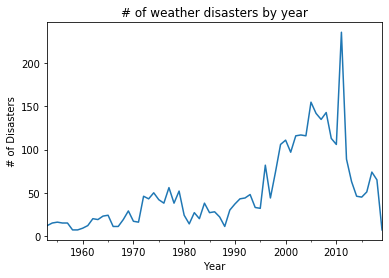

In [19]:
final_df = df_weather_disasters.set_index("Declaration Date").to_period("Y")
disasters_by_year = final_df.groupby(level=0).count()
# Let's create the plot
ax = disasters_by_year.rename({"Title":"# Disasters"}, axis=1).plot(y='# Disasters', use_index=True);
ax.set_title("# of weather disasters by year");
ax.set_xlabel("Year");
ax.set_ylabel("# of Disasters");
ax.legend().set_visible(False);

Another plot is the number of weather disasters by state.

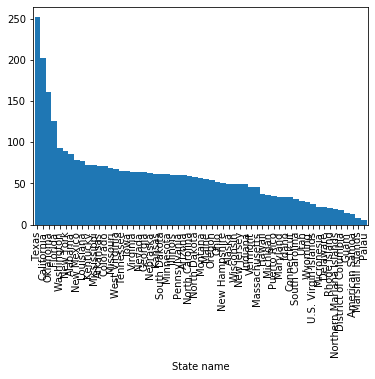

In [20]:
ax = df_weather_disasters.groupby(["State name"]).count().sort_values('Title', ascending=False).plot.bar(y='Title', use_index=True, width=1);
ax.legend().set_visible(False);

My final plot consider the number of disasters by state and by incident.

In [21]:
df_by_state_incident = (df_weather_disasters[["State name", "Incident Type", "Title"]]
                        .groupby(["State name", "Incident Type"])
                        .count()
                        .unstack("Incident Type").fillna(0).astype(int))
df_by_state_incident.loc[:,("Title",'Total')] = df_by_state_incident.sum(axis=1)
df_by_state_incident.columns = df_by_state_incident.columns.droplevel()
df_by_state_incident.sort_values(by=["Total"], inplace=True, ascending=False)
df_by_state_incident.head()

Incident Type,Coastal Storm,Drought,Fire,Flood,Freezing,Hurricane,Severe Ice Storm,Severe Storm(s),Snow,Tornado,Typhoon,Total
State name,,,,,,,,,,,,
Texas,2,1,152,38,2,21,1,20,0,15,0,252
California,2,1,147,37,3,1,0,12,0,0,0,203
Oklahoma,0,0,76,22,0,1,9,41,1,11,0,161
Florida,2,0,42,13,6,40,0,22,0,1,0,126
Washington,1,1,43,30,0,0,1,17,0,0,0,93


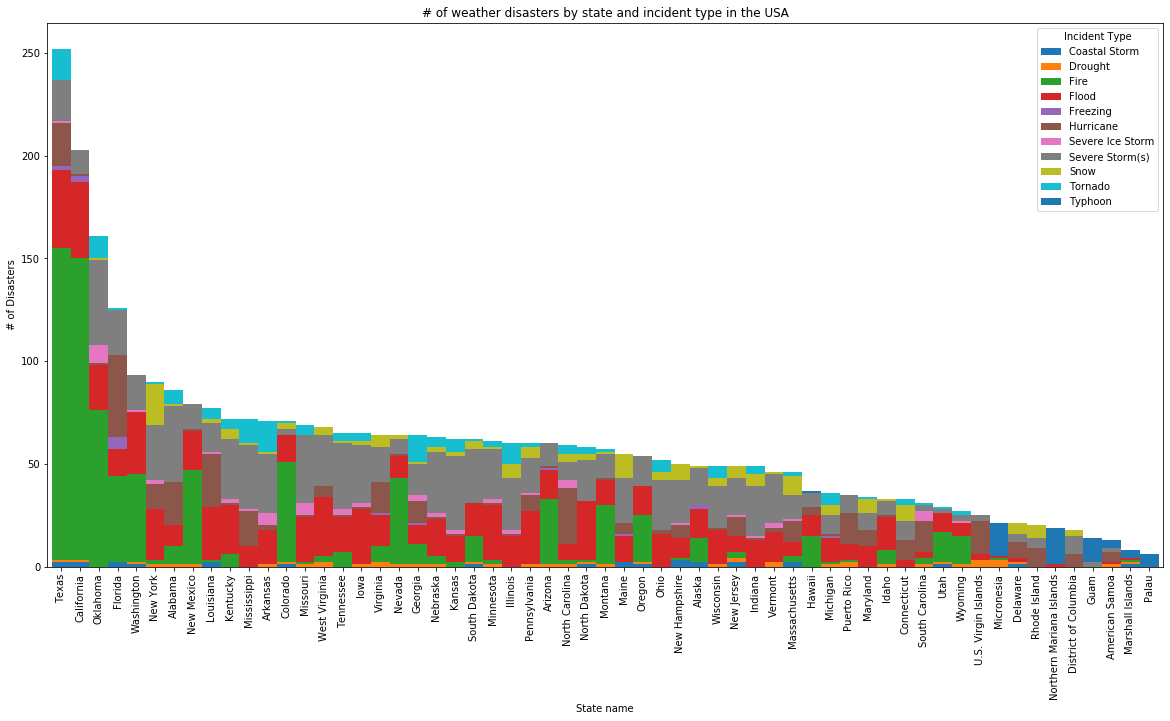

In [29]:
ax = df_by_state_incident.drop("Total",axis=1).plot(kind='bar', stacked=True, width=1)
ax.get_figure().set_size_inches(20,10)
ax.set_ylabel("# of Disasters");
ax.set_title("# of weather disasters by state and incident type in the USA");